# My First Pandas

## Basic Commands:

In [1]:
import numpy as np
import pandas as pd

In [2]:
# Series
s = pd.Series([1,3,5,np.nan,6,8])
s

0    1.0
1    3.0
2    5.0
3    NaN
4    6.0
5    8.0
dtype: float64

Creating a **DataFrame** by passing a NumPy array, with a datetime index and labeled columns:

In [3]:
dates = pd.date_range('20200101', periods = 6)
dates

DatetimeIndex(['2020-01-01', '2020-01-02', '2020-01-03', '2020-01-04',
               '2020-01-05', '2020-01-06'],
              dtype='datetime64[ns]', freq='D')

In [5]:
mydf = pd.DataFrame(np.random.randn(6,4), index = dates, columns=list('ABCD'))
mydf

,A,B,C,D
2020-01-01,0.195663,-0.124686,0.019505,0.725566
2020-01-02,-0.596906,-0.440553,-0.136409,1.430202
2020-01-03,0.815089,0.705167,-1.303605,2.735417
2020-01-04,-0.800171,-0.736602,0.296361,0.287512
2020-01-05,-0.893890,-0.570206,0.378538,-1.501675
2020-01-06,-0.956225,-0.178669,0.492074,-0.409820


Creating a **DataFrame** by passing a dict of objects that can be converted to series-like.

In [8]:
mydf2 = pd.DataFrame({
    'A':1.0,
    'B':pd.Timestamp('20200101'),
    'C':pd.Series(1, index = list(range(4)), dtype='float32'),
    'D':np.array([3] * 4, dtype='int32'),
    'E':pd.Categorical(['test','train','test','train']),
    'F':'foo'
})
mydf2

,A,B,C,D,E,F
0,1.0,2020-01-01,1.0,3,test,foo
1,1.0,2020-01-01,1.0,3,train,foo
2,1.0,2020-01-01,1.0,3,test,foo
3,1.0,2020-01-01,1.0,3,train,foo


The columns of the resulting DataFrame have different **dtypes**.

In [10]:
mydf2.dtypes

A           float64
B    datetime64[ns]
C           float32
D             int32
E          category
F            object
dtype: object

In [12]:
# Looking at the data frame header
mydf2.head()

,A,B,C,D,E,F
0,1.0,2020-01-01,1.0,3,test,foo
1,1.0,2020-01-01,1.0,3,train,foo
2,1.0,2020-01-01,1.0,3,test,foo
3,1.0,2020-01-01,1.0,3,train,foo


In [17]:
# Display rownames:
mydf.index

DatetimeIndex(['2020-01-01', '2020-01-02', '2020-01-03', '2020-01-04',
               '2020-01-05', '2020-01-06'],
              dtype='datetime64[ns]', freq='D')

## Selection Basics
Selecting a column:

In [50]:
mydf2.loc[:,'A'] # mydf2.loc[line, column] -- add : for all.

0    1.0
1    1.0
2    1.0
3    1.0
Name: A, dtype: float64

Selecting a line:

In [51]:
mydf2.loc[1,:]

A                      1
B    2020-01-01 00:00:00
C                      1
D                      3
E                  train
F                    foo
Name: 1, dtype: object

Selecting by indexes (instead of values):

In [66]:
mydf2.iloc[[2,3],[2,3]] # [line, column]

,C,D
2,1.0,3
3,1.0,3


## Plotting

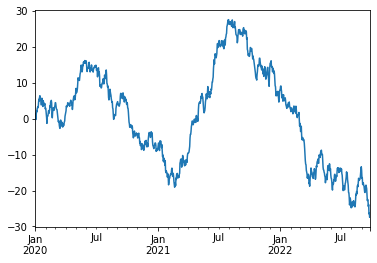

In [73]:
import matplotlib.pyplot as plt
plt.close()
ts = pd.Series(np.random.randn(1000), index=pd.date_range('20200101', periods=1000))
ts = ts.cumsum()
ts.plot()

## pandasql <3

In [80]:
import pandasql as psql
strSQL = """

SELECT
    E
FROM mydf2

"""
psql.sqldf(strSQL, locals())

,E
0,test
1,train
2,test
3,train
